# DataBase Linear regression Quetza et al 2017 

In [28]:
ENV["LINES"]=1000

1000

In [1]:
using DataFrames
using GLM
using Plots
using CSV

INFO: Recompiling stale cache file /home/marvh/.julia/lib/v0.6/CSV.ji for module CSV.


In [2]:
using LaTeXStrings

In [3]:
pyplot()

Plots.PyPlotBackend()

In [22]:
DataGolfo = CSV.read("BMPF-14junio2017Golfo.csv");
DataSUB = CSV.read("BMPF-14junio2017SUBxyoli.csv");
DataTMVB = CSV.read("BMPF-14junio2017TMVB.csv");

In [29]:
display(DataGolfo)
display(DataSUB)
display(DataTMVB)

,Evento,fecha dd/mm/aa,Tiempo hh:mm:ss,Lon,Lat,Prof,Magnitud(Mw),Mo(Nm),Caida-de-esfuerzos(Mpa),Freq-esc(Hz),Radio(km),Desplamiento(m),Energia(J),Er/mo,strike,dip,rake,Lugar,none,Quality
1,5,11/03/78,05:18:04.40,-115.03,32.27,14.4,3.7,3.85E+14,61.57,7.24,0.134,0.2275,missing,missing,missing,missing,missing,Gcal,missing,Good
2,6,11/03/78,05:40:30.40,-115.09,32.25,14.9,4.3,2.50E+15,37.59,2.4,0.308,0.2796,missing,missing,missing,missing,missing,Gcal,missing,Good
3,7,11/03/78,23:57:45.90,-115.11,32.24,0.0,4.7,1.09E+16,120.16,3.16,0.341,0.9946,missing,missing,missing,missing,missing,Gcal,missing,Good
4,8,12/03/78,00:30:17.20,-115.09,32.32,12.5,4.7,9.52E+15,78.88,2.34,0.375,0.7183,missing,missing,missing,missing,missing,Gcal,missing,Good
5,9,13/03/78,09:11:37.20,-115.1,32.31,13.2,4.0,1.12E+15,89.35,5.2,0.18,0.3836,missing,missing,missing,missing,missing,Gcal,missing,Good
6,10,15/03/78,12:56:23.40,-115.15,32.33,0.0,2.4,3.50E+12,0.06,3.72,0.3,0.0004,missing,missing,missing,missing,missing,Gcal,missing,Good
7,11,15/03/78,16:17:16.90,-115.11,32.32,0.0,2.9,2.22E+13,0.42,3.55,0.29,0.0029,missing,missing,missing,missing,missing,Gcal,missing,Good
8,12,15/03/78,20:13:17.60,-115.09,32.34,9.3,3.3,8.57E+13,21.65,9.55,0.12,0.0631,missing,missing,missing,missing,missing,Gcal,missing,Good
9,13,16/03/78,01:51:09.80,-115.08,32.34,10.5,3.8,4.42E+14,36.78,6.61,0.17,0.1549,missing,missing,missing,missing,missing,Gcal,missing,Good
10,14,17/03/78,02:42:12.30,-115.12,32.31,14.0,2.8,1.39E+13,0.84,5.75,0.19,0.004,missing,missing,missing,missing,missing,Gcal,missing,Good


,Evento,fecha_dd_mm_aa,Tiempo_hh_mm_ss,Lon,Lat,Prof,Magnitud_Mw_,Mo_Nm_,Caida_de_esfuerzos_Mpa_,Freq_esc_Hz_,Radio_km_,Desplamiento_m_,Energia_J_,Er_mo,strike,dip,rake,Lugar,none,Quality
1,1,28/08/73,09:50:39.12,-96.6,18.3,80.0,7.1,4.8e19,9.6,0.1,13.0,1.33,missing,missing,missing,missing,missing,Ver,missing,Good
2,26,05/12/78,06:32:26.00,-97.2867,15.6912,20.92,4.8,8.3e16,10.0,0.87,1.54,0.3728,7.13e10,8.59036e-7,missing,missing,missing,oax,missing,Good
3,27,05/12/78,13:01:30.00,-96.7983,15.6198,18.15,4.0,1.26e15,40.0,5.59,0.24,0.2325,7.01e9,5.56835e-6,missing,missing,missing,oax,missing,Good
4,28,05/12/78,23:41:33.00,-96.7743,15.6542,16.61,4.4,2.2e16,5.0,1.08,1.24,0.1508,4.9e10,2.22727e-6,missing,missing,missing,oax,missing,Good
5,29,06/12/78,02:24:24.00,-96.4485,15.5745,13.69,3.5,2.24e14,20.0,7.89,0.17,0.0824,missing,missing,missing,missing,missing,oax,missing,Good
6,30,06/12/78,06:47:46.00,-96.7843,16.034,28.05,3.4,1.58e14,40.0,11.17,0.12,0.1164,missing,missing,missing,missing,missing,oax,missing,Good
7,31,07/12/78,04:22:05.00,-96.9297,15.7507,16.59,3.5,2.24e14,7.0,5.56,0.24,0.0409,missing,missing,missing,missing,missing,oax,missing,Good
8,32,07/12/78,07:00:00.00,-96.862,15.9655,0.0,3.5,1.5e14,100.0,15.43,0.09,0.2108,missing,missing,missing,missing,missing,oax,missing,Good
9,33,07/12/78,23:52:00.00,-96.836,16.0757,27.78,3.7,4.47e14,30.0,7.18,0.19,0.1359,missing,missing,missing,missing,missing,oax,missing,Good
10,34,08/12/78,00:27:11.00,-96.8098,16.0417,33.77,3.6,3.16e14,40.0,8.87,0.15,0.1467,7.55e9,2.38773e-5,missing,missing,missing,oax,missing,Good


,Evento,fecha dd/mm/aa,Tiempo hh:mm:ss,Lon,Lat,Prof,Magnitud(Mw),Mo(Nm),Caida-de-esfuerzos(Mpa),Freq-esc(Hz),Radio(km),Desplamiento(m),Energia(J),Er/mo,strike,dip,rake,Lugar,,Quality
1,2,12/07/74,02:41:52.50,-99.2,19.21,7.0,3.8,5.34e14,53.3,5.47,0.16,0.2212,missing,missing,missing,missing,missing,TMVB,missing,Fair
2,3,25/03/76,23:05:00.50,-99.33,20.4807,4.0,5.0,4.5e16,0.7,0.4,3.0,0.0531,missing,missing,242,64,-174,TMVB,missing,Good
3,4,04/10/76,06:59:16.41,-99.1458,20.4927,4.0,5.1,5.6e16,0.7,0.45,3.0,0.066,missing,missing,291,76,-25,TMVB,missing,Good
4,42,22/02/79,09:16:33,-100.176,19.8936,8.19,5.5,1.75e17,8.236,0.635,2.02,0.4551,missing,missing,280,66,-48,TMVB,T,Good
5,43,22/02/79,10:38:00,-100.191,19.9166,8.53,3.6,2.69e14,0.56,1.96,0.701,0.0058,missing,missing,missing,missing,missing,TMVB,T,Good
6,44,22/02/79,09:57:00,-100.202,19.8738,4.96,3.4,1.38e14,0.06,1.26,1.005,0.0014,missing,missing,missing,missing,missing,TMVB,T,Fair
7,45,22/02/79,10:26:00,-100.177,19.8531,7.86,3.1,4.9e13,0.116,2.21,0.62,0.0014,missing,missing,missing,missing,missing,TMVB,T,Good
8,46,22/02/79,10:28:00,-100.135,19.8287,3.32,3.3,7.9e13,0.518,2.5,0.79,0.0013,missing,missing,missing,missing,missing,TMVB,T,Good
9,47,22/02/79,12:15:00,-100.147,19.8853,9.72,3.3,9.02e13,0.613,3.16,0.4,0.006,missing,missing,missing,missing,missing,TMVB,T,Good
10,48,22/02/79,19:45:00,-100.171,19.8352,4.96,3.9,7.95e14,0.405,1.17,1.12,0.0067,missing,missing,missing,missing,missing,TMVB,T,Good


In [ ]:
DataGolfo[:Magnitud]=round.(collect(skipmissing(DataGolfo[:Magnitud])),1);
DataSUB[:Magnitud]=round.(collect(skipmissing(DataSUB[:Magnitud])),1);
DataTMVB[:Magnitud]=round.(collect(skipmissing(DataTMVB[:Magnitud])),1);

In [ ]:
SUB = DataSUB[find(.~ismissing.(DataSUB[:,:freq_esc_])), :]; # Remove and Fc -->> NA
TMVB = DataTMVB[find(.~ismissing.(DataTMVB[:,:freq_esc_])),:]; # # Remove Fc -->> NA

# 1. Subduction Catalog

In [68]:
sub = "MSZ";
golf = "GBC";
TM = "TMVB";

In [8]:
ReMwFc = fit(LinearModel,@formula(freq_esc_ ~ Magnitud),SUB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   9.51193  0.347446 27.3767   <1e-96
Magnitud     -1.39428 0.0950758 -14.665   <1e-39


In [11]:
fMwfc(x)=coef(ReMwFc)[2] * x + coef(ReMwFc)[1];
#x = collect(1:8);
xMsf = SUB[:Magnitud];
corrMsf = fMwfc(xMsf);
#σ = coef(ReMwFc)[2];

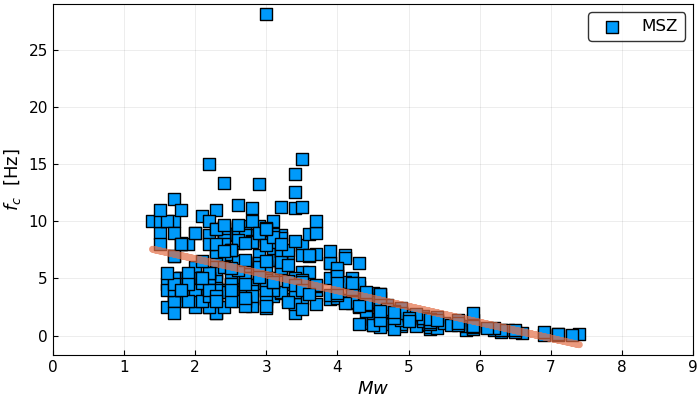

In [13]:
scatter((SUB[:Magnitud]),(SUB[:freq_esc_]),m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xMsf,corrMsf,linewidth=5,linealpha=0.7,lab="")
#plot!([corr corr],fillrange=[corr+σ,corr-σ],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsFc-Regress.pdf",dpi=400)

In [15]:
SUB[:LogRa] = log10.(collect(skipmissing(SUB[:Radio])));
ReMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),SUB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -1.15505  0.0330622 -34.9356   <1e-99
Magnitud     0.229247 0.00904721   25.339   <1e-87


In [18]:
fMwRa(x)=coef(ReMwRad)[2] * x + coef(ReMwRad)[1];
xRsub = SUB[:Magnitud];
rcorrRsub = fMwRa(xRsub);

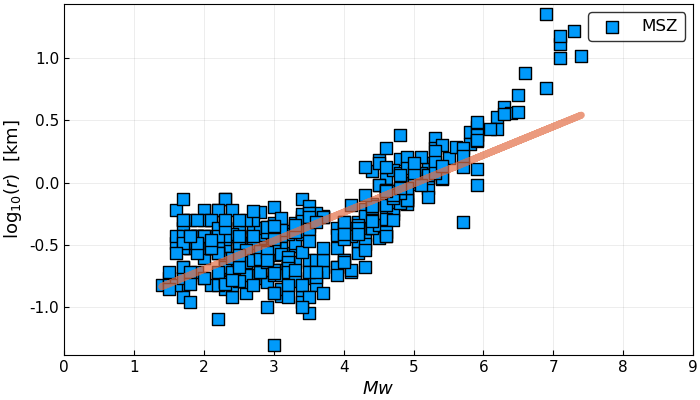

In [19]:
scatter((SUB[:Magnitud]),(SUB[:LogRa]),lab="SUB",m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xRsub,rcorrRsub,linewidth=5,linealpha=0.7,lab="")
#plot!([rcorr rcorr],fillrange=[rcorr+σr,rcorr-σr],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsR-Regress.pdf",dpi=400)

In [20]:
SUB2 = SUB[(SUB[:Desplamiento]) .> 0,:]; # Remove Despla <  0
SUB2[:LogD] = log10.(collect(skipmissing(SUB2[:Desplamiento])));
ReMwD = fit(LinearModel,@formula(LogD ~ Magnitud),SUB2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  -5.36934 0.0670598 -80.068   <1e-99
Magnitud     0.966816 0.0180232 53.6429   <1e-99


In [23]:
fMwD(x)=coef(ReMwD)[2] * x + coef(ReMwD)[1];
xDsub = SUB2[:Magnitud];
dcorrDsub = fMwD(xDsub);

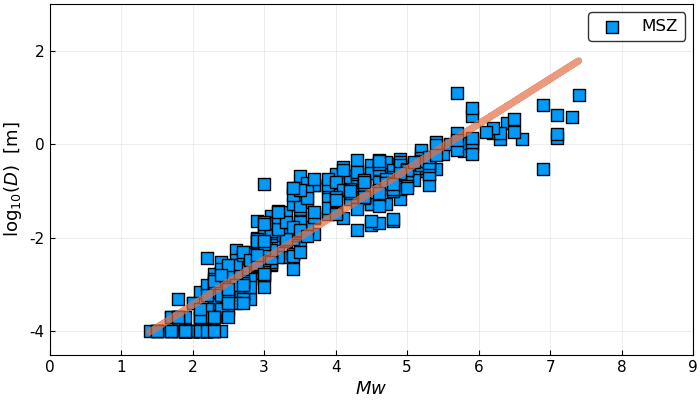

In [24]:
scatter((SUB2[:Magnitud]),(SUB2[:LogD]), m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",ylims=(-4.5,3),xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xDsub,dcorrDsub,linewidth=5,linealpha=0.7,lab="")
#plot!([dcorr dcorr],fillrange=[dcorr+σd,dcorr-σd],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsDRegress.pdf",dpi=400)

# 2. Golfo Catalog

In [25]:
ReGolMwFc = lm(@formula(freq_esc_ ~ Magnitud),DataGolfo)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   14.0548  0.265168  53.0034   <1e-99
Magnitud     -2.62695  0.146923 -17.8797   <1e-50


In [26]:
GolfMwfc(x)=coef(ReGolMwFc)[2] * x + coef(ReGolMwFc)[1];
xFGo = DataGolfo[:Magnitud];
GolcorrF = GolfMwfc(xFGo);

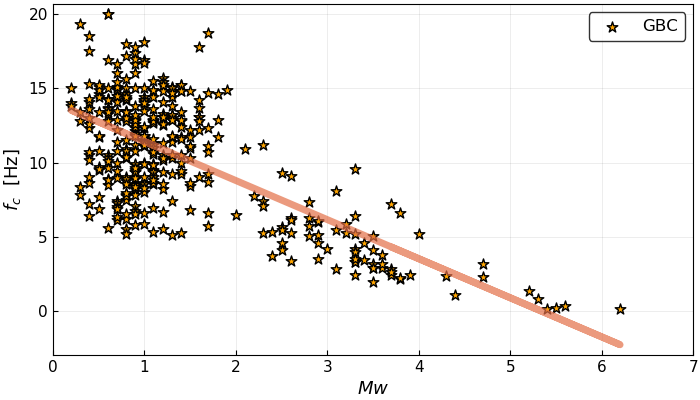

In [28]:
scatter((DataGolfo[:Magnitud]),(DataGolfo[:freq_esc_]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xFGo,GolcorrF,linewidth=5,linealpha=0.7,lab="")
#plot!(x,[GolcorrF GolcorrF],fillrange=[GolcorrF+err,GolcorrF-err],fillalpha=0.8,c=:orange,leg=false)
#PyPlot.savefig("MwvsFc-Regress.pdf",dpi=400)

In [29]:
#DataGolfo[:LogRa] = log10(DataGolfo[:Radio]);
DataGolfo[:LogRa]= log10.(collect(skipmissing(DataGolfo[:Radio])))
ReGolMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),DataGolfo)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -1.38045  0.0158827 -86.9151   <1e-99
Magnitud     0.255237 0.00880023  29.0034   <1e-95


In [31]:
GolMwRad(x)=coef(ReGolMwRad)[2] * x + coef(ReGolMwRad)[1];
xRGo = DataGolfo[:Magnitud];
GolcorrRad = GolMwRad(xRGo);
#σFGol = stderr(ReGolMwRad)[2];
#err = sqrt(sum((DataGolfo[:LogRa] - GolcorrRad).^2)/length(GolcorrF))

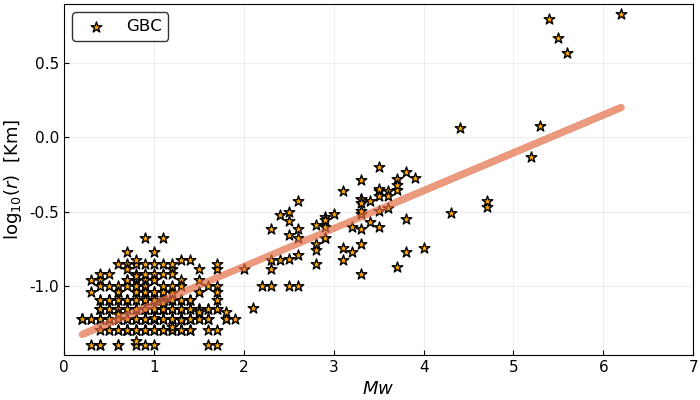

In [32]:
scatter((DataGolfo[:Magnitud]),(DataGolfo[:LogRa]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [Km]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xRGo,GolcorrRad,linewidth=5,linealpha=0.7,lab="")

In [33]:
Golf2 = DataGolfo[(DataGolfo[:Desplamiento]) .> 0,:]; # Remove Despla <  0
#Golf2[:LogD] = log10(Golf2[:Desplamiento]);
Golf2[:LogD] = log10.(collect(skipmissing(Golf2[:Desplamiento])))
ReGolMwD = fit(LinearModel,@formula(LogD ~ Magnitud),Golf2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.89782 0.0341321 -143.496   <1e-99
Magnitud     0.911625 0.0189118  48.2041   <1e-99


In [34]:
GolMwD(x)=coef(ReGolMwD)[2] * x + coef(ReGolMwD)[1];
xDGo = Golf2[:Magnitud];
GolcorrD = GolMwD(xDGo);

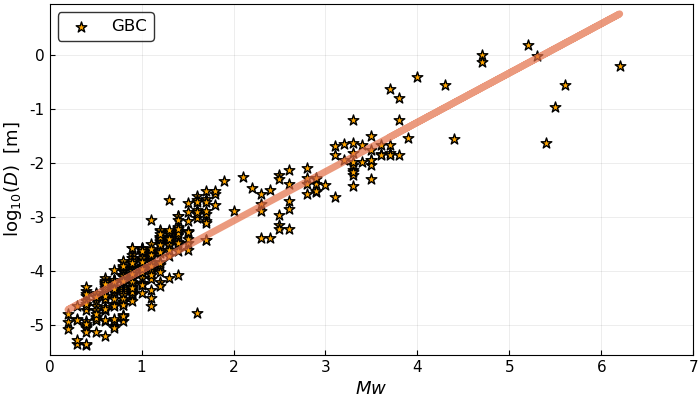

In [35]:
scatter((Golf2[:Magnitud]),(Golf2[:LogD]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xDGo,GolcorrD,linewidth=5,linealpha=0.7,lab="")

# 3. TMVB Catalog

In [36]:
ReTMVBMwFc = fit(LinearModel,@formula(freq_esc_ ~ Magnitud),TMVB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   14.3905   1.52304  9.44853   <1e-14
Magnitud     -3.14853  0.461065 -6.82883    <1e-9


In [37]:
TMVBMwfc(x)=coef(ReTMVBMwFc)[2] * x + coef(ReTMVBMwFc)[1];
xFtm = TMVB[:Magnitud];
TMVBcorrF = TMVBMwfc(xFtm);

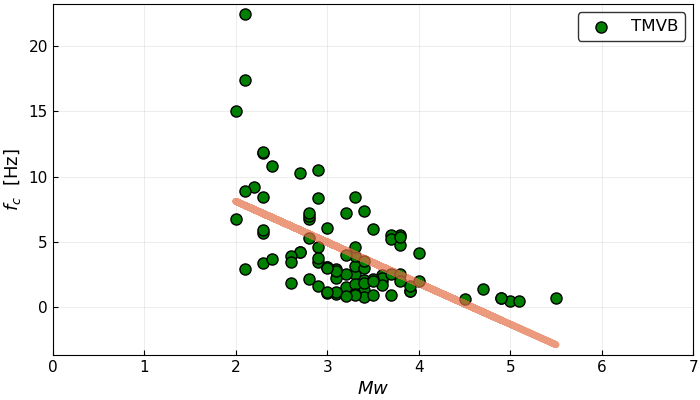

In [38]:
scatter((TMVB[:Magnitud]),(TMVB[:freq_esc_]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xFtm,TMVBcorrF,linewidth=5,linealpha=0.7,lab="")

In [39]:
#TMVB[:LogRa] = log10(TMVB[:Radio]);
TMVB[:LogRa] = log10.(collect(skipmissing(TMVB[:Radio])))
ReTMVBMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),TMVB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -1.66291  0.127588 -13.0334   <1e-21
Magnitud     0.406094 0.0386244  10.5139   <1e-16


In [40]:
TMVBMwRad(x)=coef(ReTMVBMwRad)[2] * x + coef(ReTMVBMwRad)[1];
xRtm = TMVB[:Magnitud];
TMVBcorrRad = TMVBMwRad(xRtm);

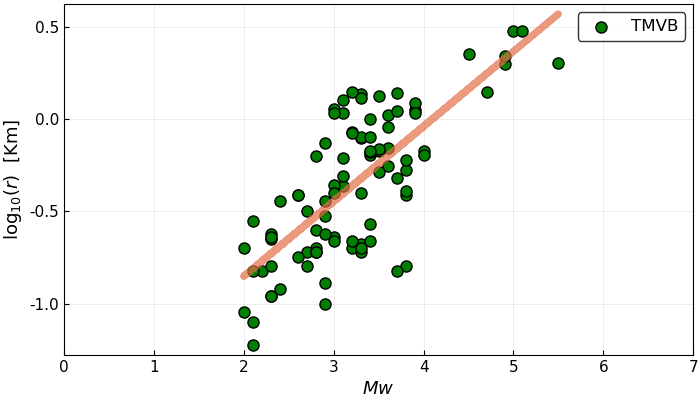

In [41]:
scatter((TMVB[:Magnitud]),(TMVB[:LogRa]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [Km]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xRtm,TMVBcorrRad,linewidth=5,linealpha=0.7,lab="")

In [42]:
TMVB2 = TMVB[(TMVB[:Desplamiento]) .> 0,:]; # Remove Despla <  0
#TMVB2[:LogD] = log10(TMVB2[:Desplamiento]);
TMVB2[:LogD] = log10.(collect(skipmissing(TMVB2[:Desplamiento])))
ReTMVBMwD = fit(LinearModel,@formula(LogD ~ Magnitud),TMVB2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.51779  0.270541 -16.6991   <1e-28
Magnitud     0.663164 0.0818999  8.09726   <1e-11


In [43]:
TMVBMwD(x)=coef(ReTMVBMwD)[2] * x + coef(ReTMVBMwD)[1];
xDtm = TMVB2[:Magnitud];
TMVBcorrD = TMVBMwD(xDtm);

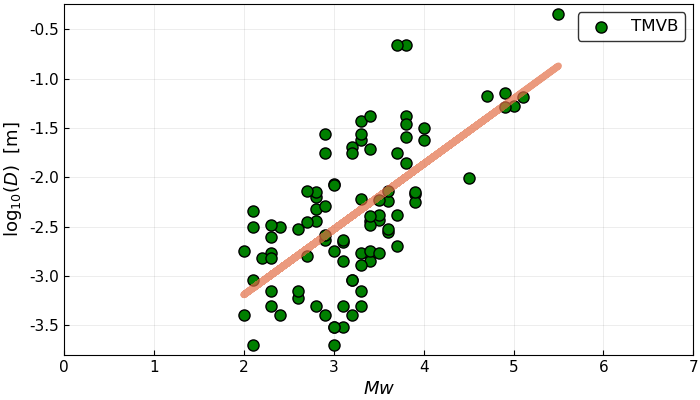

In [44]:
scatter((TMVB2[:Magnitud]),(TMVB2[:LogD]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xDtm,TMVBcorrD,linewidth=5,linealpha=0.7,lab="")

# All subplot

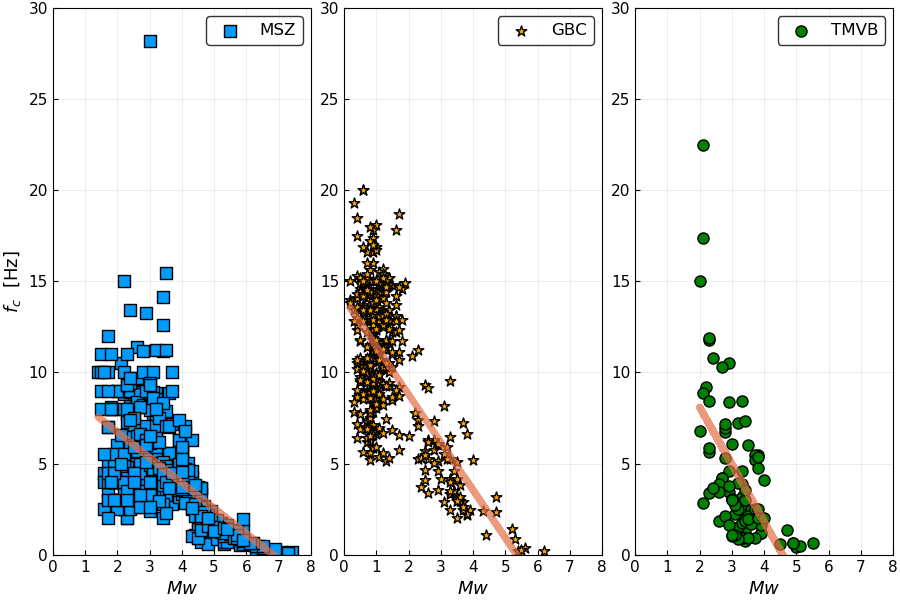

In [99]:
# MW vs FC
#PyPlot.subplot(1,3,1)
su=scatter((SUB[:Magnitud]),(SUB[:freq_esc_]),m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
su=plot!(xMsf,corrMsf,linewidth=5,linealpha=0.7,lab="")

#PyPlot.subplot(1,3,2)
gol=scatter((DataGolfo[:Magnitud]),(DataGolfo[:freq_esc_]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
gol=plot!(xFGo,GolcorrF,linewidth=5,linealpha=0.7,lab="")

#PyPlot.subplot(1,3,3)
tm=scatter((TMVB[:Magnitud]),(TMVB[:freq_esc_]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tm=plot!(xFtm,TMVBcorrF,linewidth=5,linealpha=0.7,lab="")

plot(su,gol,tm,layout=(1,3),size=(900,600),ylims=(0,30),grid=:true)
#PyPlot.savefig("MwvsFcT-Regress.pdf",dpi=400)

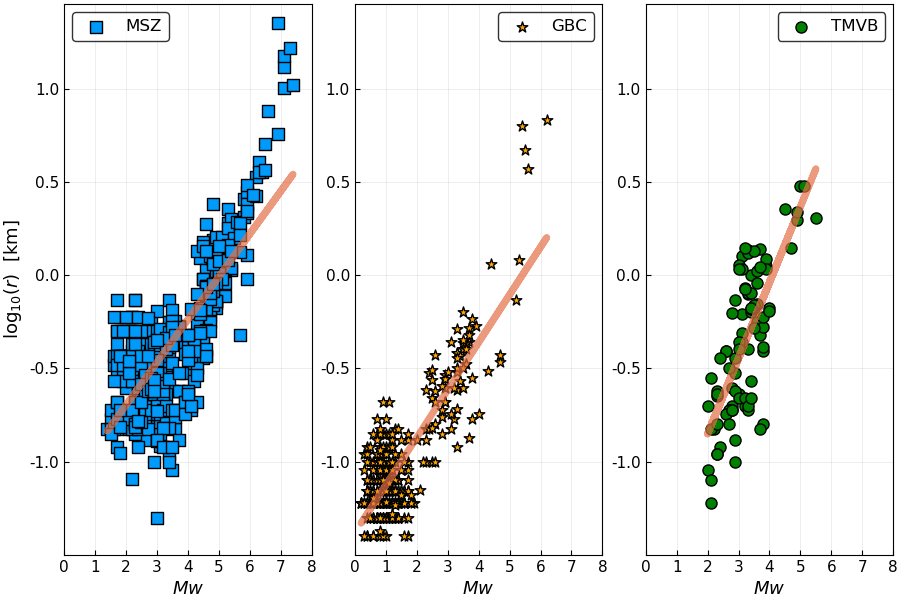

In [105]:
su=scatter((SUB[:Magnitud]),(SUB[:LogRa]),lab="SUB",m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
su=plot!(xRsub,rcorrRsub,linewidth=5,linealpha=0.7,lab="")

gol=scatter((DataGolfo[:Magnitud]),(DataGolfo[:LogRa]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
gol=plot!(xRGo,GolcorrRad,linewidth=5,linealpha=0.7,lab="")

tm=scatter((TMVB[:Magnitud]),(TMVB[:LogRa]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tm=plot!(xRtm,TMVBcorrRad,linewidth=5,linealpha=0.7,lab="")

plot(su,gol,tm,layout=(1,3),ylims=(minimum(DataGolfo[:LogRa])-0.1,maximum(SUB[:LogRa]+0.1)),size=(900,600))

#PyPlot.savefig("MWvsR-T-Regress.pdf",dpi=400)

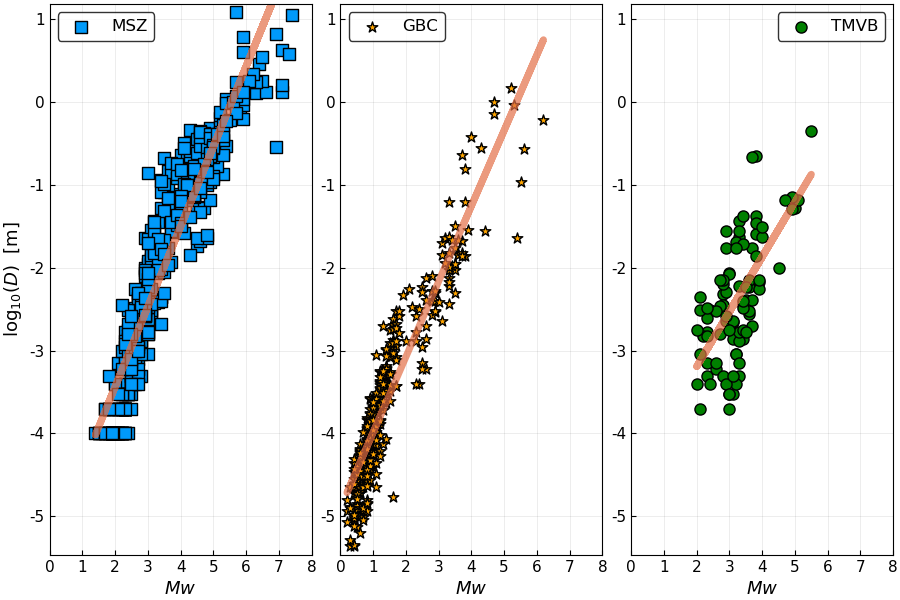

In [113]:
suD=scatter((SUB2[:Magnitud]),(SUB2[:LogD]), m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",ylims=(-4.5,3),xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
suD=plot!(xDsub,dcorrDsub,linewidth=5,linealpha=0.7,lab="")

golD=scatter((Golf2[:Magnitud]),(Golf2[:LogD]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
golD=plot!(xDGo,GolcorrD,linewidth=5,linealpha=0.7,lab="")

tmD=scatter((TMVB2[:Magnitud]),(TMVB2[:LogD]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tmD=plot!(xDtm,TMVBcorrD,linewidth=5,linealpha=0.7,lab="")

#plot(su,gol,tm,layout=(1,3),ylims=(minimum(DataGolfo[:LogRa])-0.1,maximum(SUB[:LogRa]+0.1)),size=(900,600))
plot(suD,golD,tmD,layout=(1,3),ylims=(minimum(Golf2[:LogD])-0.1,maximum(SUB2[:LogD]+0.1)),size=(900,600))

#PyPlot.savefig("MWvsD-T-Regress.pdf",dpi=400)